# **Predicting Calories Burnt During a Workout Session**


##**Introduction**

In recent years, humans have become more conscious of the need to stay
fit and healthy as it is generally perceived that an active lifestyle makes
them less prone to sicknesses and diseases. With the popularity of fitness
apps, users are increasingly interested in understanding the calories they
burn during various activities. Currently, estimates are often generalized and
do not account for individual-specific factors, such as age, weight, or gender,
which affect calorie burn rate. The goal of this project is to create a
personalized model that accurately predicts calories burned, providing users with insights tailored to their physical profiles and workout specifics.


##**Problem Statement**

To develop a machine learning regression model to predict the number of
calories burned during workout sessions based on user-specific and workout specific attributes. This prediction can help users track  their fitness progress and optimize their workout routines.

##**Use Case Statement**

The machine learning model will predict calories burned per workout session
by analyzing individual and activity characteristics. This prediction can be
integrated into fitness applications, wearables, and health platforms, allowing
users to monitor and adjust their routines.



**Importing relevant libraries for the project**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Oyeniran20/Machine-Learning/refs/heads/main/3.%20Classification%20-/Exercise.csv')
df.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,14733363,male,68,190,94,29,105,40.8,231
1,14861698,female,20,166,60,14,94,40.3,66
2,11179863,male,69,179,79,5,88,38.7,26
3,16180408,female,34,179,71,13,100,40.5,71
4,17771927,female,27,154,58,10,81,39.8,35


**Prepare Data**


The dataframe contains key features that will be relevant for the model.


*   The age, height and weight are Key demographic and body composition factors that influences calorie burn.
*   Gender is a biological factor that affects energy expenditure.
*   The heart rate is a direct indicator of workout intensity and effort.
*   The body Temperature reflects metabolic rate and body exertion during exercise.
*   The total time spent on the exercising is proportional to calorie burn.
*   Calorie burnt during the exercise session which is the target column.



In [3]:
#Checking out the shape of the data set
df.shape

(15000, 9)

The dataframe has 15000 rows and 9 columns.

In [4]:
# Obtaining more info on the data set
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   User_ID     15000 non-null  int64  
 1   Gender      15000 non-null  object 
 2   Age         15000 non-null  int64  
 3   Height      15000 non-null  int64  
 4   Weight      15000 non-null  int64  
 5   Duration    15000 non-null  int64  
 6   Heart_Rate  15000 non-null  int64  
 7   Body_Temp   15000 non-null  float64
 8   Calories    15000 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 1.0+ MB


The dataset has no null values

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
User_ID,15000.0,1.497736e+07,2.872851e+06,10001159.0,12474190.75,14997285.0,17449278.75,19999647.0
Age,15000.0,4.278980e+01,1.698026e+01,20.0,28.00,39.0,56.00,79.0
Height,15000.0,1.744651e+02,1.425811e+01,123.0,164.00,175.0,185.00,222.0
Weight,15000.0,7.496687e+01,1.503566e+01,36.0,63.00,74.0,87.00,132.0
Duration,15000.0,1.553060e+01,8.319203e+00,1.0,8.00,16.0,23.00,30.0
Heart_Rate,15000.0,9.551853e+01,9.583328e+00,67.0,88.00,96.0,103.00,128.0
Body_Temp,15000.0,4.002545e+01,7.792299e-01,37.1,39.60,40.2,40.60,41.5
Calories,15000.0,8.953953e+01,6.245698e+01,1.0,35.00,79.0,138.00,314.0


## **Exploratory Data Analysis**

In [6]:
#Checking out the columns in the dataset
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories'],
      dtype='object')

In [7]:
#Checking the columns with numerical colu
columns = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'Calories']

In [8]:
# !pip install matplotlib
# !pip install seaborn

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

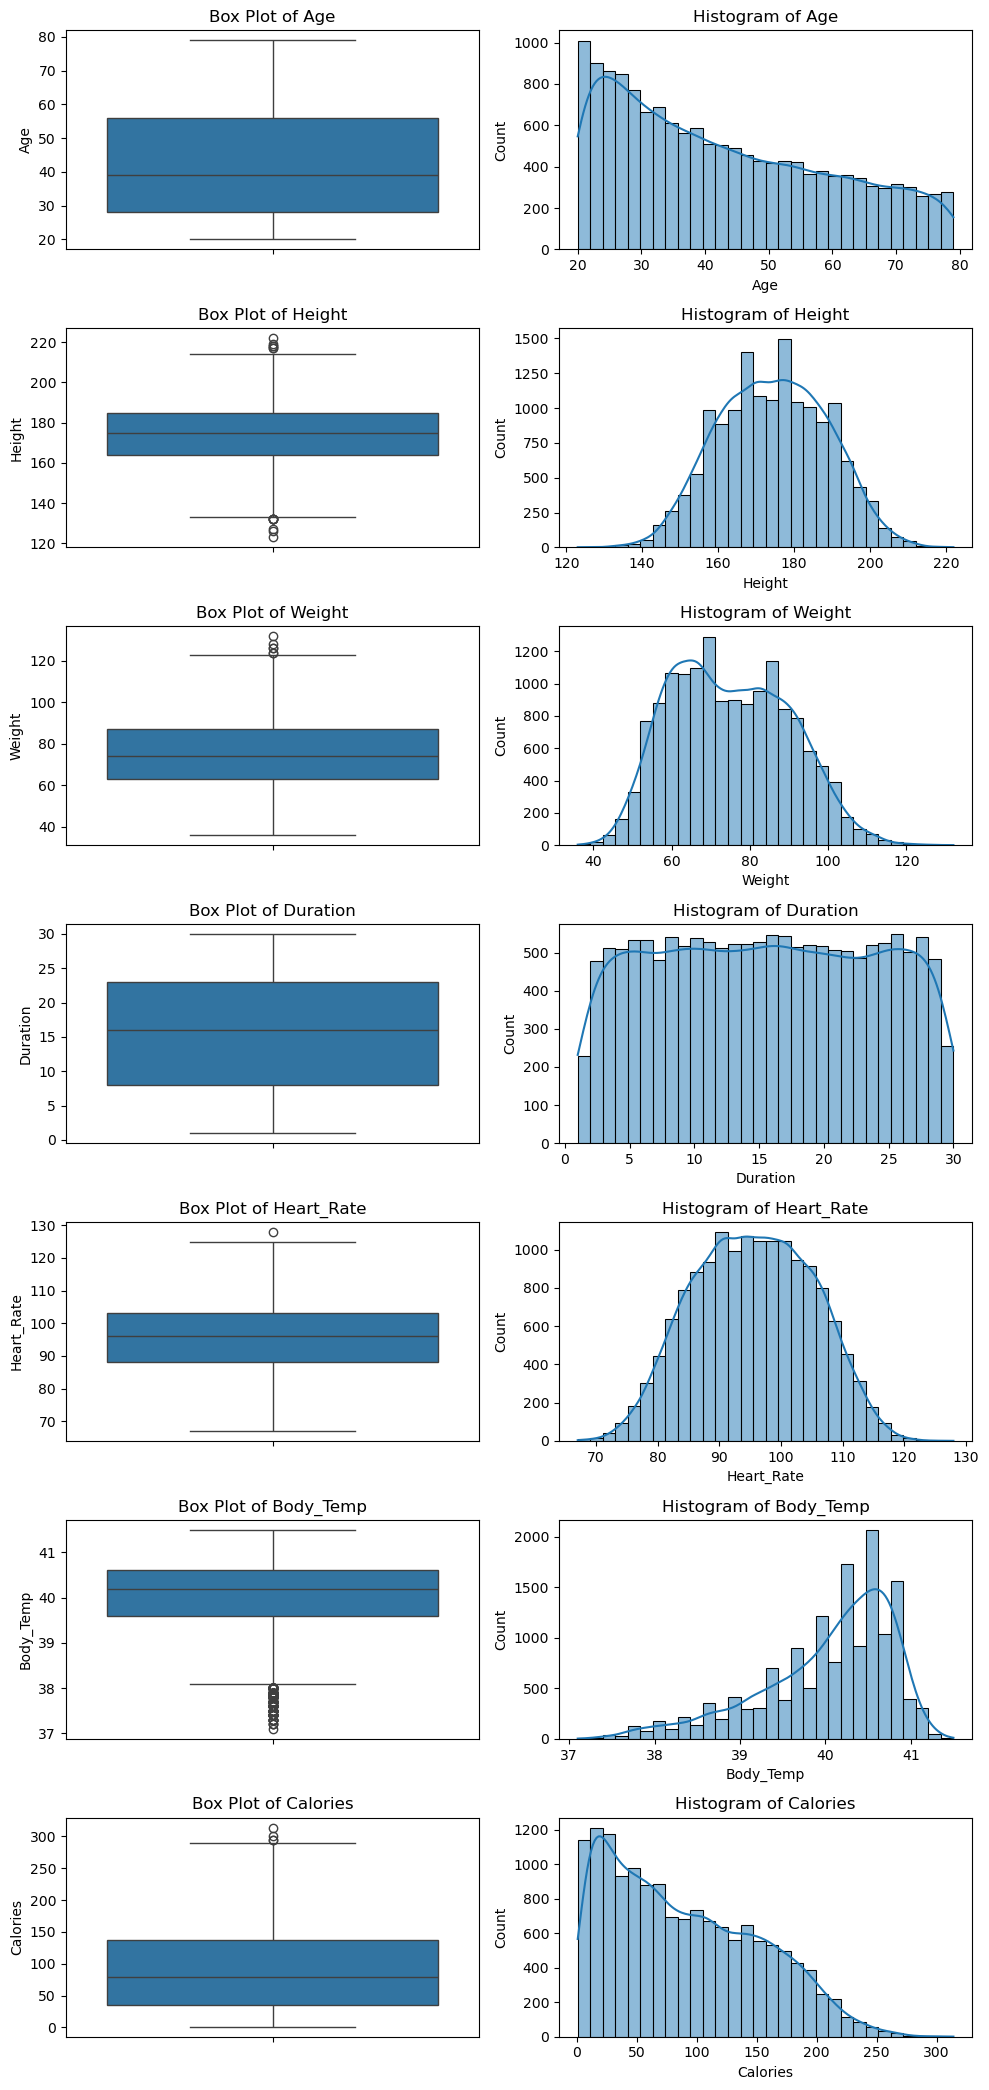

In [10]:
fig, axes = plt.subplots(nrows=len(columns), ncols=2, figsize=(10, 3 * len(columns)))

for i, col in enumerate(columns):
  # Box plot
  sns.boxplot(y=df[col], ax=axes[i, 0])
  axes[i, 0].set_title(f'Box Plot of {col}')
  axes[i, 0].set_ylabel(col)

  # Histogram
  sns.histplot(df[col], ax=axes[i, 1], bins=30, kde=True)
  axes[i, 1].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

The target variable (Calories) is skewed, that is not normally distributed. Transformation is need to make it normally distributed.

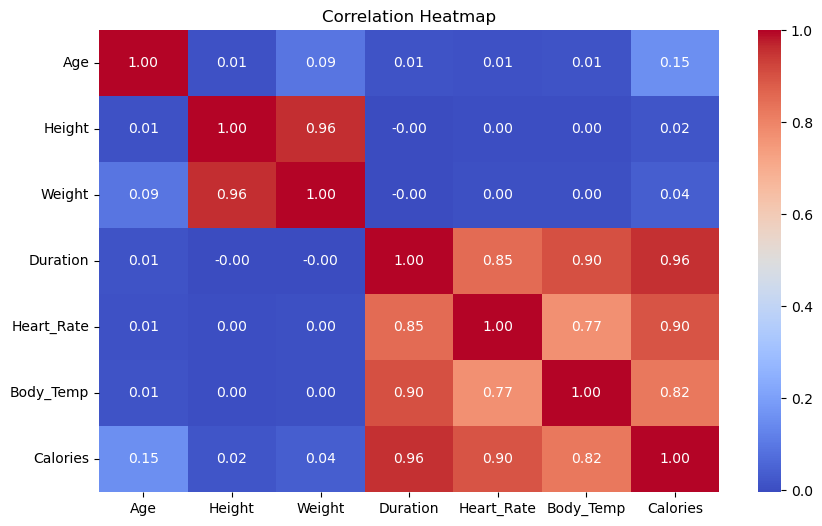

In [11]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[columns].corr(),fmt= '.2f', annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

This analysis revealed notable instances of multicollinearity among several of the variables, which could affect the regression model.

In particular:

1. **Height and Weight** exhibited a very high correlation coefficient of **0.958**.

2. **Duration and Body_Temp** had a similarly high correlation of **0.903**, while **Duration and Heart_Rate** showed a correlation of **0.853**.

Given the significant multicollinearity observed, steps may need to be taken to mitigate its impact. Potential solutions include removing one variable from each highly correlated pair (e.g., retaining `Height` while excluding `Weight`) or applying dimensionality reduction techniques like Principal Component Analysis (PCA) to combine these correlated variables.

**Capping of the Outliers**

In [12]:
# !pip install scipy

In [13]:
# IQR capping for non-normally distributed columns: Age and Body_Temp
for col in ['Age', 'Body_Temp']:
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  # Cap values above and below bounds
  df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
  df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])

from scipy.stats import zscore
# Z-score capping for normally distributed columns: Height, Weight, Duration, Heart_Rate
for col in ['Height', 'Weight', 'Duration', 'Heart_Rate']:
  z_scores = zscore(df[col])
  abs_z_scores = np.abs(z_scores)

  # Cap values above and below threshold using mean +- z_threshold * std
  z_threshold = 3
  df[col] = np.where(abs_z_scores > z_threshold, df[col].mean() + z_threshold * df[col].std(), df[col])
  df[col] = np.where(abs_z_scores > z_threshold, df[col].mean() - z_threshold * df[col].std(), df[col])


**Feature Construction**

In [14]:
 # Height is converted from cm to meters

df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2


In [15]:
# Define new age bins and corresponding labels for broader categories
age_bins = [0, 30, 60, 80]
age_labels = ['Young', 'Middle-aged', 'Old']

# Create a new column 'Age Group' with these broader age categories
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

In [16]:
df[['Age', 'Age_Group']].head()

,Age,Age_Group
0,68.0,Old
1,20.0,Young
2,69.0,Old
3,34.0,Middle-aged
4,27.0,Young


**Transformation of Target Columns (Calories)**

In [17]:
df['log_calories'] = np.log1p(df['Calories'])
df['Calories_sqrt'] = np.sqrt(df['Calories'])

In [18]:
df.columns

Index(['User_ID', 'Gender', 'Age', 'Height', 'Weight', 'Duration',
       'Heart_Rate', 'Body_Temp', 'Calories', 'BMI', 'Age_Group',
       'log_calories', 'Calories_sqrt'],
      dtype='object')

In [19]:
columns = ['log_calories', 'Calories_sqrt']

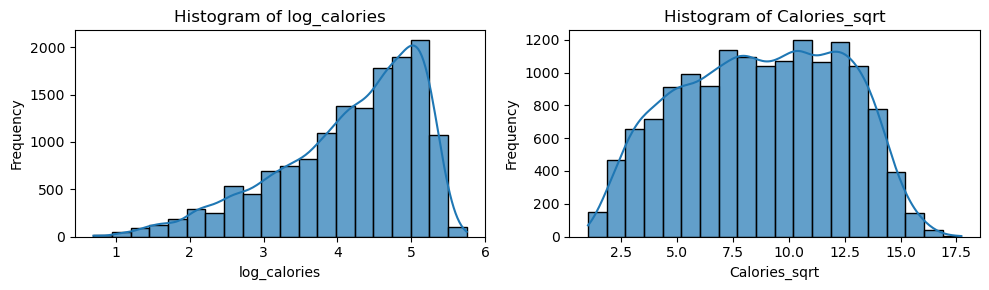

In [20]:
plt.figure(figsize=(10, 3))
for i, col in enumerate(columns, 1):
    plt.subplot(1, 2, i)  # Create subplots
    sns.histplot(df[col], bins=20, edgecolor='black', alpha=0.7, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

**Data Preparation**

In [21]:
X = df.drop(['User_ID', 'Calories', 'log_calories', 'Calories_sqrt'], axis=1)
y = df['Calories_sqrt']

**Data Splitting**

In [22]:
# !pip install scikit-learn

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [24]:
# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Define numerical & categorical features
num_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'BMI']
cat_features = ['Gender', 'Age_Group']

In [26]:
# Define preprocessing steps
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

pca_transformer = Pipeline(steps=[
    ('pca', PCA(n_components=2))  # Reduce dimensionality while keeping variance
])

In [27]:
# Apply preprocessing
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features),
    ('pca', pca_transformer, ['Duration', 'Heart_Rate', 'Body_Temp']) 
])

These three features are closely related physiological metrics that measure exertion during exercise:

- Duration → How long the exercise lasts.
- Heart Rate → Increases with exertion and duration.
- Body Temperature → Rises with exertion and duration

In [28]:
# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

In [29]:
# Evaluate models
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Predict & Evaluate
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name}: MSE = {mse:.4f}, R² = {r2:.4f}")

Linear Regression: MSE = 0.1475, R² = 0.9886
Random Forest: MSE = 0.0186, R² = 0.9986
Gradient Boosting: MSE = 0.0229, R² = 0.9982


In [30]:
# Final model selection: Random Forest (best performing in initial tests)
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', final_model)
])

In [31]:
# Train on full dataset
final_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['Age', 'Height', 'Weight',
                                                   'Duration', 'Heart_Rate',
                                                   'Body_Temp', 'BMI']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['Gender', 'Age_Group']),
                                                 ('pca',
                                                  Pipeline(steps=[('pca',
                                                                   PCA(n_components=2))]),
                                                  ['Duration', 'Heart_Rate',
                                                   'Body_Temp'])])),
                ('model', RandomForestRegressor(random_state=42))])

In [32]:
# Save model
joblib.dump(final_pipeline, 'calories_burnt_predictor.pkl')
print("Final model saved as 'calories_burnt_predictor.pkl'")

Final model saved as 'calories_burnt_predictor.pkl'


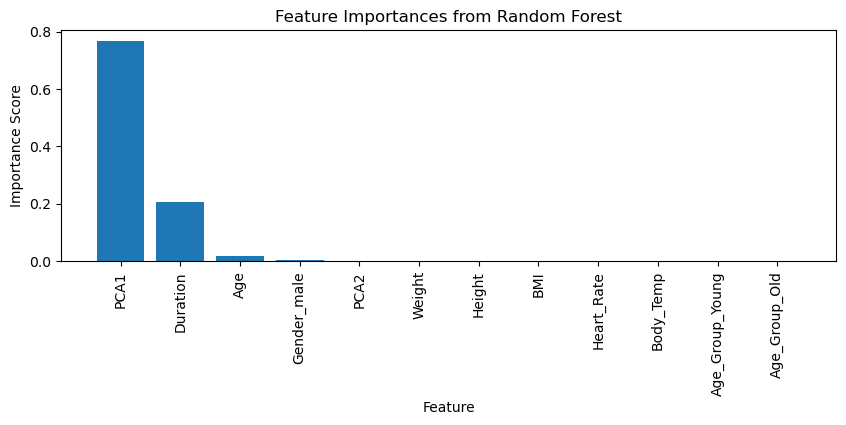

In [33]:
# Extract Feature Importance
final_model.fit(preprocessor.transform(X_train), y_train)  # Train Random Forest on transformed features

feature_names = (
    num_features +
    list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_features)) +
    ['PCA1', 'PCA2']  # Add PCA components as features
)

# Plot Feature Importance
importances = final_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 3))
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances from Random Forest")
plt.show()

### WITH NO PCA

Linear Regression: MSE = 0.1259, R² = 0.9903
Random Forest: MSE = 0.0193, R² = 0.9985
Gradient Boosting: MSE = 0.0266, R² = 0.9979
Final model saved as 'calories_burnt_predictor_nopca.pkl'


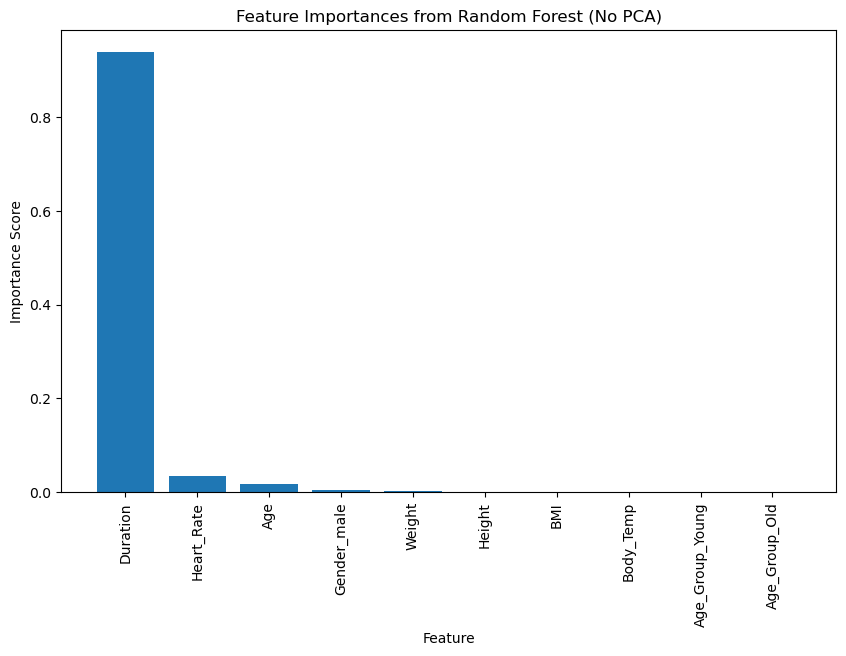

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load Data
df = pd.read_csv('https://raw.githubusercontent.com/Oyeniran20/Machine-Learning/refs/heads/main/3.%20Classification%20-/Exercise.csv')

# Feature Engineering: Create BMI
df['BMI'] = df['Weight'] / (df['Height'] / 100) ** 2

# Feature Engineering: Age Grouping
age_bins = [0, 30, 60, 80]
age_labels = ['Young', 'Middle-aged', 'Old']
df['Age_Group'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

# Feature Transformation: Log & Square Root (Keep both for analysis)
df['log_calories'] = np.log1p(df['Calories'])
df['Calories_sqrt'] = np.sqrt(df['Calories'])

# Select target variable
y = df['Calories_sqrt']

# Drop unnecessary columns
X = df.drop(columns=['User_ID', 'Calories', 'log_calories', 'Calories_sqrt'])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define numerical & categorical features
num_features = ['Age', 'Height', 'Weight', 'Duration', 'Heart_Rate', 'Body_Temp', 'BMI']  # No PCA, so keep all numerical features
cat_features = ['Gender', 'Age_Group']

# Define preprocessing steps
num_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

cat_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore'))
])

# Apply preprocessing (No PCA)
preprocessor = ColumnTransformer(transformers=[
    ('num', num_transformer, num_features),
    ('cat', cat_transformer, cat_features)
])

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42)
}

# Evaluate models
for model_name, model in models.items():
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    # Train model
    pipeline.fit(X_train, y_train)
    
    # Predict & Evaluate
    y_pred = pipeline.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"{model_name}: MSE = {mse:.4f}, R² = {r2:.4f}")
    
# Define final model (Random Forest)
final_model = RandomForestRegressor(n_estimators=100, random_state=42)
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', final_model)
])

# Train on full dataset
final_pipeline.fit(X_train, y_train)

# Save model
joblib.dump(final_pipeline, 'calories_burnt_predictor_nopca.pkl')
print("Final model saved as 'calories_burnt_predictor_nopca.pkl'")

# Extract Feature Importance
final_model.fit(preprocessor.transform(X_train), y_train)  # Train Random Forest on transformed features

# Get feature names after transformation
feature_names = (
    num_features +  # Keep all numerical features
    list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(cat_features))  # Categorical
)

# Plot Feature Importance
importances = final_model.feature_importances_
sorted_indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(importances)), importances[sorted_indices], align="center")
plt.xticks(range(len(importances)), np.array(feature_names)[sorted_indices], rotation=90)
plt.xlabel("Feature")
plt.ylabel("Importance Score")
plt.title("Feature Importances from Random Forest (No PCA)")
plt.show()
